In [0]:
%config IPCompleter.greedy=True

In [2]:
%tensorflow_version 1.x
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
print(tf.__version__)
print(keras.__version__)

TensorFlow 1.x selected.


Using TensorFlow backend.


1.15.2
2.3.1


In [0]:
from keras import backend as K

def reset_tf_session():
  curr_session=tf.get_default_session()
  if curr_session is not None:
    curr_session.close()
  K.clear_session()
  config=tf.ConfigProto()
  config.gpu_options.allow_growth=True
  s=tf.InteractiveSession(config=config)
  K.set_session(s)
  return s

In [0]:
def load_dataset(flatten=False):
  (X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
  X_train=X_train.astype(float)/255.
  X_test=X_test.astype(float)/255.
  X_train,X_val=X_train[:-10000],X_train[-10000:]
  y_train,y_val=y_train[:-10000],y_train[-10000:]
  if flatten:
    X_train=X_train.reshape([X_train.shape[0],-1])
    X_val=X_val.reshape([X_val.shape[0],-1])
    X_test=X_test.reshape([X_test.shape[0],-1])
  return X_train,y_train,X_val,y_val,X_test,y_test

def load_dataset_from_file(flatten=False):
  (X_train,y_train),(X_test,y_test)=load_data()
  X_train=X_train.astype(float)/255.
  X_test=X_test.astype(float)/255.
  X_train,X_val=X_train[:-10000],X_train[-10000:]
  y_train,y_val=y_train[:-10000],y_train[-10000:]
  if flatten:
    X_train=X_train.reshape([X_train[0],-1])
    X_val=X_val.reshape([X_val.shape[0],-1])
    X_test=X_test.reshape([X_test.shape[0],-1])
  return X_train,y_train,X_test,y_test,X_val,y_val

def load_data(path='mnist.npz'):
  with np.load(path) as f:
    x_train,y_train=f['x_train'],f['y_train']
    x_test,y_test=f['x_test'],f['y_test']
  return (x_train,y_train),(x_test,y_test)

In [5]:
X_train,y_train,X_val,y_val,X_test,y_test=load_dataset()

11493376/11490434 [==============================] - 1s 0us/step


X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


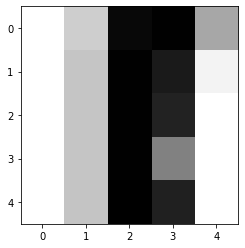

And the whole sample:


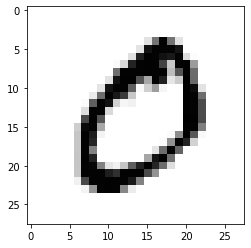

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
print('X_train [shape %s] sample patch:\n'%
      (str(X_train.shape)),X_train[1,15:20,5:10])
print('A closeup of a sample patch:')
plt.imshow(X_train[1,15:20,5:10],cmap='Greys')
plt.show()
print('And the whole sample:')
plt.imshow(X_train[1],cmap='Greys')
plt.show()
print('y_train [shape %s] 10 samples:\n'%
      str(y_train.shape),y_train[:10])

In [7]:
X_train_flat=X_train.reshape((X_train.shape[0],-1))
print(X_train_flat.shape)
X_val_flat=X_val.reshape((X_val.shape[0],-1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [8]:
import keras

y_train_oh=keras.utils.to_categorical(y_train,10)
y_val_oh=keras.utils.to_categorical(y_val,10)
print(y_train_oh.shape)
print(y_train_oh[:3],y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [0]:
s=reset_tf_session()

In [0]:
W=tf.get_variable('W',shape=(784,10),dtype='float32')
b=tf.get_variable('b',shape=(10,),dtype='float32')

In [0]:
input_X=tf.placeholder(tf.float32,shape=(None,784),name='input_X')
input_y=tf.placeholder(tf.float32,shape=(None,10),name='input_y')

In [12]:
logits=tf.add(tf.matmul(input_X,W),b)
probas=tf.nn.softmax(logits)
classes=tf.argmax(probas,axis=-1)
loss=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=input_y,logits=logits))
step=tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from matplotlib import pyplot as plt
from IPython.display import clear_output, display_html, HTML
import contextlib
import time
import io
import urllib
import base64


def clear_and_display_figure(fig, sleep=0.01):
    img_data = io.BytesIO()
    fig.savefig(img_data, format='jpeg')
    img_data.seek(0)
    uri = 'data:image/jpeg;base64,' + urllib.request.quote(base64.b64encode(img_data.getbuffer()))
    img_data.close()
    clear_output(wait=True)
    display_html(HTML('<img src="' + uri + '">'))
    


class SimpleMovieWriter(object):
    """
    Usage example:
        anim = animation.FuncAnimation(...)
        anim.save(None, writer=SimpleMovieWriter(sleep=0.01))
    """
    def __init__(self, sleep=0.1):
        self.sleep = sleep

    def setup(self, fig):
        self.fig = fig

    def grab_frame(self, **kwargs):
        clear_and_display_figure(self.fig, self.sleep)

    @contextlib.contextmanager
    def saving(self, fig, *args, **kwargs):
        self.setup(fig)
        try:
            yield self
        finally:
            pass


class SimpleTrainingCurves(object):
    def __init__(self, loss_name, metric_name):
        self.fig, (self.ax1, self.ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
        self.ax1.set_title(loss_name)
        self.ax2.set_title(metric_name)
        self.train_loss_curve, = self.ax1.plot([], [], 'r', label='train', lw=2)
        self.valid_loss_curve, = self.ax1.plot([], [], 'g', label='valid', lw=2)
        self.train_metric_curve, = self.ax2.plot([], [], 'r', label='train', lw=2)
        self.valid_metric_curve, = self.ax2.plot([], [], 'g', label='valid', lw=2)
        self.iter = 0
        self.y_limits_1 = [None, None]
        self.y_limits_2 = [None, None]
        plt.close(self.fig)

    def _update_y_limits(self, limits, *values):
        limits[0] = min(list(values) + ([limits[0]] if limits[0] else []))
        limits[1] = max(list(values) + ([limits[1]] if limits[1] else []))

    def _update_curve(self, curve, value, label):
        x, y = curve.get_data()
        curve.set_data(list(x) + [self.iter], list(y) + [value])
        curve.set_label("{}: {}".format(label, value))

    def _set_y_limits(self, ax, limits):
        spread = limits[1] - limits[0]
        ax.set_ylim(limits[0] - 0.05*spread, limits[1] + 0.05*spread)

    def add(self, train_loss, valid_loss, train_metric, valid_metric):
        self._update_curve(self.train_loss_curve, train_loss, "train")
        self._update_curve(self.valid_loss_curve, valid_loss, "valid")
        self._update_curve(self.train_metric_curve, train_metric, "train")
        self._update_curve(self.valid_metric_curve, valid_metric, "valid")
        self.ax1.set_xlim(0, self.iter)
        self.ax2.set_xlim(0, self.iter)
        self._update_y_limits(self.y_limits_1, train_loss, valid_loss)
        self._update_y_limits(self.y_limits_2, train_metric, valid_metric)
        self._set_y_limits(self.ax1, self.y_limits_1)
        self._set_y_limits(self.ax2, self.y_limits_2)
        clear_and_display_figure(self.fig)
        self.ax1.legend()
        self.ax2.legend()
        self.iter += 1
        self.fig.show()


In [0]:
%matplotlib inline

epochs:9) loss = 0.2951144874095917, accuracy = 0.9199


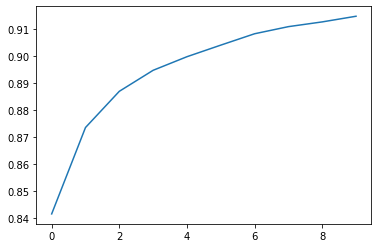

In [106]:
import time
from IPython.display import Image,display

s.run(tf.global_variables_initializer())
BATCH_SIZE=512
EPOCHS=10

plt.ion()
#simpleTrainingCurves=SimpleTrainingCurves('cross_entropy','accuracy')
fig,ax=plt.subplots()
curve=ax.plot([],[])
data=[]
for epoch in range(EPOCHS):
  batch_losses=[]
  for batch_start in range(0,X_train_flat.shape[0],
                           BATCH_SIZE):
    _,batch_loss=s.run([step,loss],{input_X:
                                    X_train_flat[batch_start:
                                                 batch_start+BATCH_SIZE],
                                    input_y:
                                    y_train_oh[batch_start:
                                                 batch_start+BATCH_SIZE]}
                       )
    batch_losses.append(batch_loss)
  train_loss=np.mean(batch_losses)
  val_loss=s.run(loss,{input_X:X_val_flat,
                         input_y:y_val_oh})
  train_accuracy=accuracy_score(y_train,s.run(classes,{input_X:
                                                         X_train_flat,
                                                         input_y:
                                                         y_train_oh}))
  valid_accuracy=accuracy_score(y_val,s.run(classes,{input_X:
                                                       X_val_flat,
                                                       input_y:
                                                       y_val_oh}))
  print(f'epochs:{epoch}) loss = {val_loss}, accuracy = {valid_accuracy}',
        end='\n')
  data.append(train_accuracy)
  plt.plot(range(epoch+1),data)
  plt.show()
  # time.sleep(1)
  clear_output(wait=True)
  
  # simpleTrainingCurves.add(train_loss,val_loss,
  #                            train_accuracy,valid_accuracy)


In [101]:
list(range(1))

[0]

In [0]:
test_predictions=model.predict_proba(X_test).argmax(axis=-1)
test_answers=y_test.argmax(axis=-1)

test_accuracy=np.mean(test_predictions==test_answers)

print('\nTest accuracy: {} %'.format(test_accuracy*100))

In [0]:
%load_ext tensorboard

In [0]:
from keras.callbacks import TensorBoard
model.fit(X_train,y_train,validation_data=(X_val,y_val),
          epochs=10,
          callbacks=[TensorBoard('tmp/tboard')])

In [0]:
%tensorboard --logdir tmp/tboard